# CAP 5610 - Introduction to Machine Learning <br>Florida International University - Fall 2018
## Problem Set #3



#### Problem 1. **[10 points]** Artificial Neural Networks

Suppose that we have the following dataset:

(-1.6930476519295277,
 2.689683884193551,
 -1.121533145757048,
 1.6446470913859756)

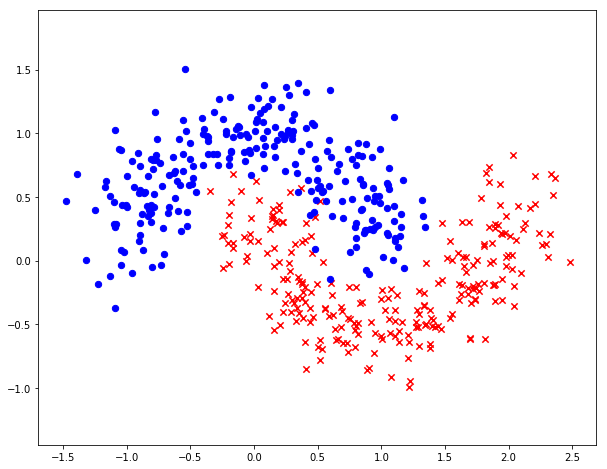

In [36]:
%matplotlib widget
%matplotlib inline
import numpy as np
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display, Math, Latex

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

X, y = make_moons(500, noise=0.2, random_state=42)
plt.scatter(X[:,0][y==1], X[:,1][y==1], s=40, marker='x',c='red')
plt.scatter(X[:,0][y==0], X[:,1][y==0], s=40, marker='o',c='blue')
plt.axis('equal')

Here, $X=\{x^{(1)},x^{(2)}, \dots,x^{(m)}  \}$ and $x^{(i)} \in \mathbb{R}$ where each sample has two features. Each sample is labeled into two categories with labels $y^{(i)} \in \{0,1\}$. The ANN that we will use here is a simple 3 layer network, with 3 neurons in the input layer, 2 neurons in the hidden layer, and 1 neuron in the output layer. Suppose that we use the mean square error (MSE), as the loss function to optimize the network. Recall that the MSE is

$$ \mathcal{L}(\hat{y},y)=\frac{1}{m} \sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2$$

a) For this ANN, suppose that the activation function used is a tanh activation function. What is the gradient descent update for the output layer, layer 3, that is:

$$\frac{\partial\mathcal{L}}{\partial \mathbf{W}^{[\ell]}} = \text{?}$$

where $\ell = 3$.

#### Solution.

In sec. 8.4.2 of the class notes for this course we have been given the following formula for the update of the output layer
\begin{equation}
    \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[3]}}=\frac{\partial \mathcal{L}}{\partial \mathbf{a}^{[3]}}\frac{\partial \mathbf{a}^{[3]}}{\partial \mathbf{z}^{[3]}}\frac{\partial \mathbf{z}^{[3]}}{\partial \mathbf{W}^{[3]}}
\end{equation}
Also we have been given that 
\begin{equation}
    \mathcal{L}(\hat{y},y)= \frac{1}{m} \sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})^2=\frac{1}{m} \sum_{i=1}^{m} l(\hat{y},y)
\end{equation}
but because (eq. 8.6 or 8.10)
\begin{equation}
    \hat{y}^{i}=\mathbf{a}^{[3]}=(\mathbf{a}^{[3]})^{(i)}
\end{equation}
\begin{equation*}
   = \tanh(\mathbf{W}^{[3]}\tanh(\mathbf{W}^{[2]}\tanh(\mathbf{W}^{[1]}\mathbf{x}^{(i)} +\mathbf{b}^{[1]}) +\mathbf{b}^{[2]}) +\mathbf{b}^{[3]})
\end{equation*}
we can rewrite $\mathcal{L}$ so that it is an average of a function of $\mathbf{a}^{[3]}$
\begin{equation}
    \mathcal{L}(\hat{y},y) = \mathbb{E}[l(\mathbf{a}^{[3]},y))]= \frac{1}{m} \sum_{i=1}^{m}((\mathbf{a}^{[3]})^{(i)}-y^{(i)})^2=\frac{1}{m} \sum_{i=1}^{m} l((\mathbf{a}^{[3]})^{(i)},y^{(i)})
\end{equation}
so that the first factor in the product (of the update in eq 1) is 
\begin{equation}
    \frac{\partial \mathcal{L}}{\partial \mathbf{a}^{[3]}}=\frac{\partial}{\partial \mathbf{a}^{[3]}}\mathbb{E}[l(\mathbf{a}^{[3]},y))]=\frac{1}{m} \sum_{i=1}^{m} \frac{\partial l(\mathbf{a}^{[3]},y)}{\partial \mathbf{a}^{[3]}}\bigg|_{((\mathbf{a}^{[3]})^{(i)},y^{(i)})} = \frac{2}{m} \sum_{i=1}^{m}((\mathbf{a}^{[3]})^{(i)}-y^{(i)})
\end{equation}
the second factor in the product (of the update in eq 1) is
\begin{equation*}
\frac{\partial \mathbf{a}^{[3]}}{\partial \mathbf{z}^{[3]}} =\frac{\partial }{\partial \mathbf{z}^{[3]}} g(\mathbf{z}^{[3]})    =\frac{d}{d\mathbf{z}^{[3]}}\tanh (\mathbf{z}^{[3]})= \frac{d}{d\mathbf{z}^{[3]}} \frac{e^{\mathbf{z}^{[3]}}-e^{-\mathbf{z}^{[3]}}}{e^{\mathbf{z}^{[3]}}+e^{-\mathbf{z}^{[3]}}} 
\end{equation*}
\begin{equation*}
(e^{\mathbf{z}^{[3]}}-e^{-\mathbf{z}^{[3]}})'\frac{1}{e^{\mathbf{z}^{[3]}}+e^{-\mathbf{z}^{[3]}}}+(e^{\mathbf{z}^{[3]}}-e^{-\mathbf{z}^{[3]}})\bigg(\frac{1}{e^{\mathbf{z}^{[3]}}+e^{-\mathbf{z}^{[3]}}}\bigg)'  
\end{equation*}
\begin{equation*}
\frac{e^{\mathbf{z}^{[3]}}+e^{-\mathbf{z}^{[3]}}}{e^{\mathbf{z}^{[3]}}+e^{-\mathbf{z}^{[3]}}}- \frac{(e^{\mathbf{z}^{[3]}}-e^{-\mathbf{z}^{[3]}})^2}{(e^{\mathbf{z}^{[3]}}+e^{-\mathbf{z}^{[3]}})^2}   = 1-\bigg(\frac{e^{\mathbf{z}^{[3]}}-e^{-\mathbf{z}^{[3]}}}{e^{\mathbf{z}^{[3]}}+e^{-\mathbf{z}^{[3]}}}\bigg)^2
\end{equation*}
\begin{equation}
    =1-\tanh^2 (\mathbf{z}^{[3]})=1-g(\mathbf{z}^{[3]})^2=1-(\mathbf{a}^{[3]})^2=\frac{\partial \mathbf{a}^{[3]}}{\partial \mathbf{z}^{[3]}}
\end{equation}
and the third factor is already given in eq 8.23 of the class notes and is equal to 
\begin{equation}
    \frac{\partial \mathbf{z}^{[3]}}{\partial \mathbf{W}^{[3]}} = \frac{\partial }{\partial \mathbf{W}^{[3]}}( \mathbf{W}^{[3]}\mathbf{a}^{[2]} +\mathbf{b}^{[3]})=(\mathbf{a}^{[2]})^T
\end{equation}
(because $\nabla f$ is a cotangent vector/element of the dual space i.e. the derivative $\nabla f$ must return a function) and therefore putting togeher equations 1,5,6, and 7 we get that 
\begin{equation}
   \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[3]}}= \frac{2}{m} \sum_{i=1}^{m}\bigg( ((\mathbf{a}^{[3]})^{(i)}-y^{(i)})\bigg)\bigg(1-((\mathbf{a}^{[3]})^{(i)})^2\bigg)((\mathbf{a}^{[2]})^{(i)})^T
\end{equation}
we could have also written it as (twice) the average of the following function 
\begin{equation}
   \frac{\partial l}{\partial \mathbf{W}^{[3]}}=  (\mathbf{a}^{[3]}-y)(1-(\mathbf{a}^{[3]})^2)((\mathbf{a}^{[2]}))^T
\end{equation}
Technically the derivation of 5 could be redone in terms of finding the value of $\frac{\partial l}{\partial \mathbf{W}^{[3]}}$ so that it has a more satisfying/rigorous derivation but the steps would be identical to the ones made thus far mutatis mutandis (i.e. we would just have to omit some $^{(i)}$'s and change some $\mathcal{L}$'s to some $l$'s and then take the average of $\frac{\partial l}{\partial \mathbf{W}^{[3]}}$ at the very end).


b) Suppose now that we use the rectified linear unit, or ReLU as the activation function.

$$ReLU: f(x) = \begin{cases} 
      x & x\gt 0 \\
      0 & otherwise 
   \end{cases}
$$

Find the gradient descent update for $\ell = 3$.

#### Solution
Using what we have already computed, we notice that equations 1,5, and 7 stay the same, therefore we have that  
\begin{equation}
    \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[3]}}=\frac{\partial \mathcal{L}}{\partial \mathbf{a}^{[3]}}\frac{\partial \mathbf{a}^{[3]}}{\partial \mathbf{z}^{[3]}}\frac{\partial \mathbf{z}^{[3]}}{\partial \mathbf{W}^{[3]}}
\end{equation}
that
\begin{equation}
    \frac{\partial \mathcal{L}}{\partial \mathbf{a}^{[3]}} = \frac{2}{m} \sum_{i=1}^{m}(\mathbf{a}^{[3]}-y^{(i)})= \frac{2}{m} \sum_{i=1}^{m}((\mathbf{a}^{[3]})^{(i)}-y^{(i)})
\end{equation}
that
\begin{equation}
    \frac{\partial \mathbf{z}^{[3]}}{\partial \mathbf{W}^{[3]}} = \frac{\partial }{\partial \mathbf{W}^{[3]}}( \mathbf{W}^{[3]}\mathbf{a}^{[2]} +\mathbf{b}^{[3]})=(\mathbf{a}^{[2]})^T
\end{equation}
and we only need to find the value of $\frac{\partial \mathbf{a}^{[3]}}{\partial \mathbf{z}^{[3]}}$. To that end we notice that 
\begin{equation*}
\frac{\partial \mathbf{a}^{[3]}}{\partial \mathbf{z}^{[3]}} =\frac{\partial }{\partial \mathbf{z}^{[3]}} g(\mathbf{z}^{[3]})    =\frac{d}{d\mathbf{z}^{[3]}}\text{ReLU} (\mathbf{z}^{[3]})=  \begin{cases} 
\frac{d}{d\mathbf{z}^{[3]}}  \mathbf{z}^{[3]}  & \text{if } \mathbf{z}^{[3]} > 0  \\
\frac{d}{d\mathbf{z}^{[3]}}   0 & \text{o.w.}  \\
\end{cases}
\end{equation*}
\begin{equation}
=  \begin{cases} 
1 & \text{if } \mathbf{z}^{[3]} > 0  \\
   0 & \text{if } \mathbf{z}^{[3]} < 0  \\
\end{cases} \text{``=''} \Theta (\mathbf{z}^{[3]}) = \frac{\partial \mathbf{a}^{[3]}}{\partial \mathbf{z}^{[3]}}
\end{equation}  
where $\Theta (\mathbf{z}^{[3]})$ is the Heaviside step function (well technically some people like to have $\Theta(0) = \frac{1}{2}$ and our gradient is undefined at 0, but this detail shouldn't be too important. Basically I'm averaging the ``robot's'' desire to move in the direction dictated by each of its influences for $x<0$ and $x>0$.). Finally, plugging in equations 10, 11, 12, and 13 we have that 
\begin{equation}
   \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[3]}}= \frac{2}{m} \sum_{i=1}^{m}\bigg( ((\mathbf{a}^{[3]})^{(i)}-y^{(i)})\bigg)\bigg(\Theta ((\mathbf{z}^{[3]})^{(i)})\bigg)((\mathbf{a}^{[2]})^{(i)})^T
\end{equation}
we could have also written it as (twice) the average of the following function 
\begin{equation}
   \frac{\partial l}{\partial \mathbf{W}^{[3]}}=  (\mathbf{a}^{[3]}-y)(\Theta (\mathbf{z}^{[3]}))((\mathbf{a}^{[2]}))^T
\end{equation}

#### Problem 2. **[10 points]** PyTorch

Implement a neural network in pytorch to classify the dataset from problem 1. Please be sure to show your training progress, as well as the decision boundary as part of your solution. Select the model architecture, activation functions, and loss functions that lead to a classifier with at least 90% accuracy.

In [5]:
### import modules
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [7]:
##data loading
inputs= torch.from_numpy(X)
inputs = inputs.float()
labels = torch.from_numpy(y)
data_set = data_utils.TensorDataset(inputs, labels)
##split set into train set and validation set
train_size = int(0.8 * len(data_set))
valid_size = len(data_set) - train_size
train_set, valid_set = torch.utils.data.random_split(data_set, [train_size, valid_size])

train_loader= data_utils.DataLoader(train_set, batch_size=10, shuffle = True)
validation_loader= data_utils.DataLoader(valid_set, batch_size=50, shuffle = True)

In [8]:
##parameters
input_size = 2 
hidden1_size = 10
hidden2_size=5
output_size = 2
epochs = 50
learning_rate = 0.05
# Fully connected neural network with one hidden layer
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden1_size,hidden2_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size) 
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)  
        self.fc3 = nn.Linear(hidden2_size, output_size) 
    
    def forward(self, x):
        x=x.view(x.shape[0],-1)
        x1 =F.relu( self.fc1(x))
        x2 =F.relu( self.fc2(x1))
        x3 = self.fc3(x2)
        return x3
    

model = NeuralNetwork(input_size, hidden1_size, hidden2_size,output_size)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [11]:
for epoch in range(epochs):
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    #training
    for batch_idx, (x, target) in enumerate(train_loader):
        features=Variable(x)
        label=Variable(target)
        out = model(x)
        loss = criterion(out, label)
        optimizer.zero_grad()
        _, pred_label = torch.max(out.data, 1)
        total_cnt += features.shape[0]
        correct_cnt+= (pred_label == label).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt*1.0/total_cnt))
    # testing
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    for batch_idx, (x, target) in enumerate(validation_loader):
        features=Variable(x)
        label=Variable(target)
        out = model(x)
        loss = criterion(out, label)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += features.shape[0]
#       print(target.data)
        correct_cnt += (pred_label == label).sum().item()
        # smooth average
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        
        if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(validation_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt * 1.0 / total_cnt))

==>>> epoch: 0, batch index: 40, train loss: 0.625402, acc: 0.818
==>>> epoch: 0, batch index: 2, test loss: 0.118674, acc: 0.740
==>>> epoch: 1, batch index: 40, train loss: 0.526377, acc: 0.818
==>>> epoch: 1, batch index: 2, test loss: 0.097153, acc: 0.780
==>>> epoch: 2, batch index: 40, train loss: 0.372522, acc: 0.828
==>>> epoch: 2, batch index: 2, test loss: 0.077758, acc: 0.790
==>>> epoch: 3, batch index: 40, train loss: 0.316330, acc: 0.835
==>>> epoch: 3, batch index: 2, test loss: 0.067047, acc: 0.830
==>>> epoch: 4, batch index: 40, train loss: 0.298878, acc: 0.853
==>>> epoch: 4, batch index: 2, test loss: 0.061712, acc: 0.840
==>>> epoch: 5, batch index: 40, train loss: 0.264662, acc: 0.850
==>>> epoch: 5, batch index: 2, test loss: 0.058638, acc: 0.870
==>>> epoch: 6, batch index: 40, train loss: 0.276371, acc: 0.858
==>>> epoch: 6, batch index: 2, test loss: 0.054979, acc: 0.840
==>>> epoch: 7, batch index: 40, train loss: 0.295988, acc: 0.855
==>>> epoch: 7, batch in

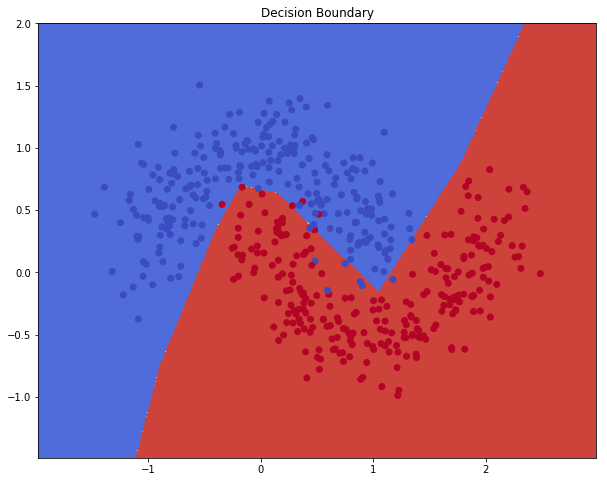

In [12]:
# show the decision boundary
# Set min and max values and give it some padding
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.001
    
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
c=np.stack((xx.ravel(),yy.ravel()))
c=np.transpose(c)
grid= torch.from_numpy(c)
grid = grid.float()
# Predict the function value for the whole gid
out = model(grid)
_, Z = torch.max(out.data, 1)
Z = Z.reshape(xx.shape)
Z=Z.detach().numpy() 
# Plot the contour and training examples
plt.title("Decision Boundary")
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


#### Problem 3. **[10 points]** Convolutional Neural Networks

a) Modify the code from example set 5 to create a convolutional neural network to classify the notMNIST dataset. You can download the dataset [here](https://www.kaggle.com/lubaroli/notmnist). Please be sure to include some type of validation/testing as part of your solution, i.e. train/test split or cross-validation.

In [30]:
# import extra libraries
import PIL
from skimage import io, transform
from skimage.io import imread
import glob
import os
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.utils.data as data_utils

In [31]:
### Download data
##curl -o notMNIST_large.tar.gz http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz
##curl -o notMNIST_small.tar.gz http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz
##tar xzf notMNIST_small.tar.gz
##tar xzf notMNIST_large.tar.gz

In [32]:
# dataset load function
class NotMnist(Dataset):
    def __init__(self, root):
        Images, Y = [], []
        data=[]
        folders = os.listdir(root)

        for folder in folders:
            folder_path = os.path.join(root, folder)
            for ims in os.listdir(folder_path):
                try:
                    image_path = os.path.join(folder_path, ims)
                    image=np.array(imread(image_path))
                    image=image.reshape(1,28,28)
                    Images.append(image)
                    Y.append(ord(folder) - 65)  # Convert labels A-J to 0-9
                except:
                    print("File {}/{} is broken".format(folder, ims))
        for i in zip(Images, Y):
            data.append(i)
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image = self.data[index][0]
        target = self.data[index][1]
        # Input for Conv2D should be Channels x Height x Width
        image_tensor = transforms.ToTensor()(image).view(1,28,28).float()
        return (image_tensor, target)

In [33]:
## load data from 'notMNIST_large' as training set,  load data from 'notMNIST_small' as validation set
train_loader= data_utils.DataLoader(NotMnist('notMNIST_large'), batch_size=64, shuffle = True)
validation_loader = torch.utils.data.DataLoader(NotMnist('notMNIST_small'), batch_size=64, shuffle=True)

File A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png is broken
File A/Um9tYW5hIEJvbGQucGZi.png is broken
File A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png is broken
File B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png is broken
File D/VHJhbnNpdCBCb2xkLnR0Zg==.png is broken
File F/.ipynb_checkpoints is broken
File A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png is broken


In [34]:
# CNN Neural Network
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [35]:
# using GPU
model = CNN()
model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.02)

criterion = nn.CrossEntropyLoss()

# train the model for 10 epochs
for epoch in range(10):
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        x, target = x.cuda(), target.cuda()
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        correct_cnt+= (pred_label == target).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt*1.0/total_cnt))
    # testing
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    for batch_idx, (x, target) in enumerate(validation_loader):
        x, target = x.cuda(), target.cuda()
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        correct_cnt += (pred_label == target).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        
        if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(validation_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt * 1.0 / total_cnt))
    print('Test Accuracy of the model on the test images: {} %'.format((correct_cnt / total_cnt) * 100))


==>>> epoch: 0, batch index: 100, train loss: 1.195337, acc: 0.453
==>>> epoch: 0, batch index: 200, train loss: 0.965095, acc: 0.593
==>>> epoch: 0, batch index: 300, train loss: 0.785943, acc: 0.657
==>>> epoch: 0, batch index: 400, train loss: 0.704754, acc: 0.695
==>>> epoch: 0, batch index: 500, train loss: 0.682588, acc: 0.718
==>>> epoch: 0, batch index: 600, train loss: 0.634434, acc: 0.735
==>>> epoch: 0, batch index: 700, train loss: 0.658385, acc: 0.749
==>>> epoch: 0, batch index: 800, train loss: 0.555321, acc: 0.760
==>>> epoch: 0, batch index: 900, train loss: 0.592286, acc: 0.769
==>>> epoch: 0, batch index: 1000, train loss: 0.605717, acc: 0.776
==>>> epoch: 0, batch index: 1100, train loss: 0.547563, acc: 0.782
==>>> epoch: 0, batch index: 1200, train loss: 0.556005, acc: 0.787
==>>> epoch: 0, batch index: 1300, train loss: 0.611579, acc: 0.792
==>>> epoch: 0, batch index: 1400, train loss: 0.534328, acc: 0.796
==>>> epoch: 0, batch index: 1500, train loss: 0.558860, 

==>>> epoch: 1, batch index: 3500, train loss: 0.347001, acc: 0.888
==>>> epoch: 1, batch index: 3600, train loss: 0.363983, acc: 0.888
==>>> epoch: 1, batch index: 3700, train loss: 0.390277, acc: 0.888
==>>> epoch: 1, batch index: 3800, train loss: 0.418037, acc: 0.888
==>>> epoch: 1, batch index: 3900, train loss: 0.360275, acc: 0.889
==>>> epoch: 1, batch index: 4000, train loss: 0.398188, acc: 0.889
==>>> epoch: 1, batch index: 4100, train loss: 0.324629, acc: 0.889
==>>> epoch: 1, batch index: 4200, train loss: 0.387448, acc: 0.889
==>>> epoch: 1, batch index: 4300, train loss: 0.409745, acc: 0.889
==>>> epoch: 1, batch index: 4400, train loss: 0.359765, acc: 0.889
==>>> epoch: 1, batch index: 4500, train loss: 0.402090, acc: 0.889
==>>> epoch: 1, batch index: 4600, train loss: 0.409083, acc: 0.889
==>>> epoch: 1, batch index: 4700, train loss: 0.359048, acc: 0.889
==>>> epoch: 1, batch index: 4800, train loss: 0.403088, acc: 0.889
==>>> epoch: 1, batch index: 4900, train loss: 0

==>>> epoch: 2, batch index: 6900, train loss: 0.322428, acc: 0.898
==>>> epoch: 2, batch index: 7000, train loss: 0.331130, acc: 0.899
==>>> epoch: 2, batch index: 7100, train loss: 0.328758, acc: 0.899
==>>> epoch: 2, batch index: 7200, train loss: 0.372181, acc: 0.899
==>>> epoch: 2, batch index: 7300, train loss: 0.353289, acc: 0.899
==>>> epoch: 2, batch index: 7400, train loss: 0.408558, acc: 0.899
==>>> epoch: 2, batch index: 7500, train loss: 0.355302, acc: 0.899
==>>> epoch: 2, batch index: 7600, train loss: 0.390489, acc: 0.899
==>>> epoch: 2, batch index: 7700, train loss: 0.330818, acc: 0.899
==>>> epoch: 2, batch index: 7800, train loss: 0.395669, acc: 0.899
==>>> epoch: 2, batch index: 7900, train loss: 0.346464, acc: 0.899
==>>> epoch: 2, batch index: 8000, train loss: 0.374226, acc: 0.899
==>>> epoch: 2, batch index: 8100, train loss: 0.304506, acc: 0.899
==>>> epoch: 2, batch index: 8200, train loss: 0.361856, acc: 0.899
==>>> epoch: 2, batch index: 8268, train loss: 0

==>>> epoch: 4, batch index: 1600, train loss: 0.367404, acc: 0.905
==>>> epoch: 4, batch index: 1700, train loss: 0.338877, acc: 0.905
==>>> epoch: 4, batch index: 1800, train loss: 0.336720, acc: 0.905
==>>> epoch: 4, batch index: 1900, train loss: 0.301194, acc: 0.905
==>>> epoch: 4, batch index: 2000, train loss: 0.364548, acc: 0.905
==>>> epoch: 4, batch index: 2100, train loss: 0.326639, acc: 0.904
==>>> epoch: 4, batch index: 2200, train loss: 0.267272, acc: 0.905
==>>> epoch: 4, batch index: 2300, train loss: 0.344231, acc: 0.904
==>>> epoch: 4, batch index: 2400, train loss: 0.301174, acc: 0.905
==>>> epoch: 4, batch index: 2500, train loss: 0.372576, acc: 0.905
==>>> epoch: 4, batch index: 2600, train loss: 0.310818, acc: 0.905
==>>> epoch: 4, batch index: 2700, train loss: 0.278404, acc: 0.905
==>>> epoch: 4, batch index: 2800, train loss: 0.328237, acc: 0.905
==>>> epoch: 4, batch index: 2900, train loss: 0.304384, acc: 0.905
==>>> epoch: 4, batch index: 3000, train loss: 0

==>>> epoch: 5, batch index: 5000, train loss: 0.359657, acc: 0.908
==>>> epoch: 5, batch index: 5100, train loss: 0.309503, acc: 0.908
==>>> epoch: 5, batch index: 5200, train loss: 0.268567, acc: 0.908
==>>> epoch: 5, batch index: 5300, train loss: 0.374501, acc: 0.908
==>>> epoch: 5, batch index: 5400, train loss: 0.338572, acc: 0.908
==>>> epoch: 5, batch index: 5500, train loss: 0.288556, acc: 0.908
==>>> epoch: 5, batch index: 5600, train loss: 0.365291, acc: 0.908
==>>> epoch: 5, batch index: 5700, train loss: 0.327381, acc: 0.908
==>>> epoch: 5, batch index: 5800, train loss: 0.289873, acc: 0.908
==>>> epoch: 5, batch index: 5900, train loss: 0.315429, acc: 0.908
==>>> epoch: 5, batch index: 6000, train loss: 0.355428, acc: 0.908
==>>> epoch: 5, batch index: 6100, train loss: 0.302606, acc: 0.908
==>>> epoch: 5, batch index: 6200, train loss: 0.371577, acc: 0.908
==>>> epoch: 5, batch index: 6300, train loss: 0.312122, acc: 0.908
==>>> epoch: 5, batch index: 6400, train loss: 0

==>>> epoch: 6, batch index: 100, test loss: 0.127447, acc: 0.962
==>>> epoch: 6, batch index: 200, test loss: 0.152832, acc: 0.960
==>>> epoch: 6, batch index: 293, test loss: 0.142788, acc: 0.960
Test Accuracy of the model on the test images: 95.96240119632557 %
==>>> epoch: 7, batch index: 100, train loss: 0.352297, acc: 0.906
==>>> epoch: 7, batch index: 200, train loss: 0.358042, acc: 0.910
==>>> epoch: 7, batch index: 300, train loss: 0.327680, acc: 0.911
==>>> epoch: 7, batch index: 400, train loss: 0.322544, acc: 0.912
==>>> epoch: 7, batch index: 500, train loss: 0.289469, acc: 0.912
==>>> epoch: 7, batch index: 600, train loss: 0.336869, acc: 0.911
==>>> epoch: 7, batch index: 700, train loss: 0.303071, acc: 0.911
==>>> epoch: 7, batch index: 800, train loss: 0.288530, acc: 0.910
==>>> epoch: 7, batch index: 900, train loss: 0.310465, acc: 0.911
==>>> epoch: 7, batch index: 1000, train loss: 0.275909, acc: 0.911
==>>> epoch: 7, batch index: 1100, train loss: 0.304778, acc: 0.

==>>> epoch: 8, batch index: 3100, train loss: 0.289129, acc: 0.912
==>>> epoch: 8, batch index: 3200, train loss: 0.336329, acc: 0.912
==>>> epoch: 8, batch index: 3300, train loss: 0.279681, acc: 0.912
==>>> epoch: 8, batch index: 3400, train loss: 0.318992, acc: 0.912
==>>> epoch: 8, batch index: 3500, train loss: 0.275025, acc: 0.912
==>>> epoch: 8, batch index: 3600, train loss: 0.275350, acc: 0.912
==>>> epoch: 8, batch index: 3700, train loss: 0.317614, acc: 0.912
==>>> epoch: 8, batch index: 3800, train loss: 0.292753, acc: 0.912
==>>> epoch: 8, batch index: 3900, train loss: 0.303155, acc: 0.912
==>>> epoch: 8, batch index: 4000, train loss: 0.345269, acc: 0.912
==>>> epoch: 8, batch index: 4100, train loss: 0.253228, acc: 0.912
==>>> epoch: 8, batch index: 4200, train loss: 0.318822, acc: 0.912
==>>> epoch: 8, batch index: 4300, train loss: 0.301152, acc: 0.912
==>>> epoch: 8, batch index: 4400, train loss: 0.311541, acc: 0.912
==>>> epoch: 8, batch index: 4500, train loss: 0

==>>> epoch: 9, batch index: 6500, train loss: 0.354205, acc: 0.913
==>>> epoch: 9, batch index: 6600, train loss: 0.351495, acc: 0.913
==>>> epoch: 9, batch index: 6700, train loss: 0.270336, acc: 0.913
==>>> epoch: 9, batch index: 6800, train loss: 0.334028, acc: 0.913
==>>> epoch: 9, batch index: 6900, train loss: 0.246851, acc: 0.913
==>>> epoch: 9, batch index: 7000, train loss: 0.285940, acc: 0.913
==>>> epoch: 9, batch index: 7100, train loss: 0.339864, acc: 0.913
==>>> epoch: 9, batch index: 7200, train loss: 0.295778, acc: 0.913
==>>> epoch: 9, batch index: 7300, train loss: 0.328445, acc: 0.913
==>>> epoch: 9, batch index: 7400, train loss: 0.364473, acc: 0.913
==>>> epoch: 9, batch index: 7500, train loss: 0.305061, acc: 0.913
==>>> epoch: 9, batch index: 7600, train loss: 0.300406, acc: 0.913
==>>> epoch: 9, batch index: 7700, train loss: 0.325970, acc: 0.913
==>>> epoch: 9, batch index: 7800, train loss: 0.331528, acc: 0.913
==>>> epoch: 9, batch index: 7900, train loss: 0

Comment: Notice that the accuracy of test set is higher than the train set, it indicates that the 'notMNIST_small' could be subset of 'notMNIST_large" set.